### Simone INTINGARO - SPRINT A
# TP 1 - Physique Expérimentale 2
## Distribution du tirage de dés


Dans ce TP nous allons faire une étude statistique d'une série de lancers d'un dé, nous allons ensuite nous appuyer sur plusieurs méthodes pour essayer de détérminer si notre dé est pipé ou pas.

$$ 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Partie 1: Estimation du pipage d’un dé
Dans cette partie nous allons réaliser des tirages "manuels" d'un dé à N faces. Nous allons réporter les résultats dans une liste et nous allons effectuer une analyse statistique des lancés. Le but de l'expérience est de détérminer si un certain dé est pipé.

### Tirages et remplissage de listes

In [2]:
#Création liste des lancés

val = [6,2,3,1,3,5,6,5,4,4,6,6,3,2,5,6,4,2,2,6,3,6,4,2,2,3,5,6,2,1,3,1,4,5,2,3,3,6,2,4,3,4,5,4,3,4,2,6,5]

#Définition d'une fonction "moyenne d'une liste"
print("Nb lancers: {}".format(len(val)))
def moyList(L) -> float:
    '''Prend en entrée une liste de réels et renvoie la moyenne de ses éléments'''
    moy = 0
    for n in L:
        moy += n 

    moy /= len(val) 
    return moy

# Calcul de la moyenne de val
print("Moyenne de val: {}".format(moyList(val)))

#Création de la liste des sommes deux à deux de la liste initiale
#On veut sommer le 1er elément avec le 2e, le 3e avec le 4e etc ---> val[i]+val[i+1] avec i un entier impair

val_2=[]

for i,n in enumerate(val):
    if (i%2==0) & (i < len(val)-2): #On vérifie que i soit impair et que l'élément d'index i+1 appartienne à la liste initiale
        val_2.append(val[i]+val[i+1])
print("Val_2 = {}".format(val_2))
        
#On calcule la moyenne de val_2
print("Moyenne de val_2: {}".format(moyList(val_2)))



Nb lancers: 49
Moyenne de val: 3.7551020408163267
Val_2 = [8, 4, 8, 11, 8, 12, 5, 11, 6, 8, 9, 6, 5, 11, 3, 4, 9, 5, 9, 6, 7, 9, 7, 8]
Moyenne de val_2: 3.6530612244897958


### Calcul des probabilités de tirage et création d’histogrammes
Pour un dé standard à N faces, la probabilité qu'un lancé résulte en une certaine valeur i est $p_i = \frac{1}{N}$.
On s'intéresse maintant au potentiel pipage du dé utilisé, c'est-à-dire à la possibilité que certaines valeurs soit plus probables que d'autres. Pour ce faire nous allons calculer la fréquence de parution de chaque valeur dans notre échantillon de tirages.
Nous allons analyser nos valeurs avec un histogramme de fréquence.

In [3]:
# Calcul du nombre d'occurences de chaque valeur
## Nous allons utiliser un dictionnaire de la forme {val:nb} avec val une valeur de lancé et nb le nombre d'oocurences

DicoVal = {}

for n in val:
    if str(n) in DicoVal:
        DicoVal[str(n)] += 1
    else:
        DicoVal[str(n)] = 1
print("Fréquences absolues: {}".format(DicoVal))

#Calcul des fréquences rélatives
DicoF = {}
for key in DicoVal.keys():
    DicoF[key] = DicoVal[key]/len(val)
print("Fréquences rélatives: {}".format(DicoF))

#Fréquence rélative théorique
pt = 1/6

#Ecart entre la valeur théorique et la valeur calculée

DicoEcart = {}

for key in DicoF.keys():
    DicoEcart[key] = DicoF[key] - pt   #Ecart = (Freq_calculée - Freq_théorique)
print("Ecarts entre les fréquences rélatives et la valeur théorique: {}".format(DicoEcart))

#Calcul moyenne des ecarts

EMoy = 0
for n in DicoEcart.values():
    EMoy += n
EMoy /= len(DicoEcart.values())
print("Moyenne des écarts de la valeur théorique: {}".format(EMoy))

Fréquences absolues: {'6': 10, '2': 10, '3': 10, '1': 3, '5': 7, '4': 9}
Fréquences rélatives: {'6': 0.20408163265306123, '2': 0.20408163265306123, '3': 0.20408163265306123, '1': 0.061224489795918366, '5': 0.14285714285714285, '4': 0.1836734693877551}
Ecarts entre les fréquences rélatives et la valeur théorique: {'6': 0.03741496598639457, '2': 0.03741496598639457, '3': 0.03741496598639457, '1': -0.10544217687074829, '5': -0.023809523809523808, '4': 0.017006802721088454}
Moyenne des écarts de la valeur théorique: 1.1564823173178714e-17


La moyenne des écarts d la fréquence théorique tend vers zéro, cela n'est pas surprénant car le calcul est: $$\frac{1}{N} \sum_{i=1}^N (f_i - p)$$
Or si on développe cette somme on obtient
$$   \frac{1}{N} \sum_{i=1}^N (f_i - p) $$
$$ \rightarrow \frac{1}{N} \sum_{i=1}^N f_i - \frac{1}{N} \sum_{i=1}^N p $$

Et sachant que $ \sum_{i=1}^N fi = 1 $ par définition et que $ \sum_{i=1}^N p = 1 $ (ici $N=6$ car c'est le nombre de valeurs possibles pour un lancer), cette différence va toujours tendre vers 0. Cette quantité n'est pas pertinente à l'analyse des données car elle ne nous donne aucune information sur la dispersion des valeurs.


Il serait pertinent de calculer la moyenne de ces écarts en valeur absolue: $\frac{1}{N} \sum_{i=1}^N |f_i - p|$ car pour un dé non-pipé cette somme va tendre vers zéro mais pour un dé pipé les écarts ne vont pas se compenser entre eux. On aura donc des valeurs positives pour un dé pipé et des valeurs qui tendent vers 0 pour un dé non-pipé.




Il est plus pertinent de calculer l'écart-type entre la valeur de chaque lancer et la moyenne des lancers: $$\sigma= \sqrt{\sum_{i=1}^N(x- \bar{x})^2} = \sqrt{\bar{x^2} - \bar{x}^2}$$

Ici $\bar{x} = $ `moyList(val)`


In [4]:
#Calcul de l'écart type
sigma = 0
#On crée la liste des carrés des valeurs de la liste initiale

carres = []
for n in val:
    carres.append(n**2)

#Formule ecart-type

sigma = moyList(carres)- moyList(val)**2

print("Ecart type: {}".format(sigma))


Ecart type: 2.470637234485631


L'écart type des lancers d'un dé parfait (non-pipé) est $\sigma_x \approx 1,7$, en comparant cette valeur théorique avec notre valeur calculée $\sigma \approx 2,5$ on peut en conclure que le dé utilisé pour l'expérience était vraisemblablement pipé.

$$

$$$$

### Analyse graphique du problème

Ici on représente sur un histogramme la fréquence absolue pour chaque valeur du dé. Nous allons ensuite représenter les fréquences relatives et les comparer avec la valeur théorique de $p = \frac{1}{6}$

Text(0, 0.5, 'Fréquence absolue')

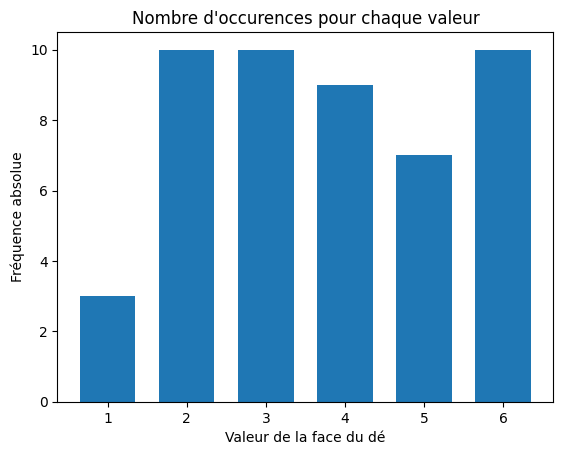

In [5]:
plt.hist(val, bins = np.arange(0.5,7.5,1), density = False, rwidth = 0.7)
plt.title("Nombre d'occurences pour chaque valeur")
plt.xlabel("Valeur de la face du dé")
plt.ylabel("Fréquence absolue")

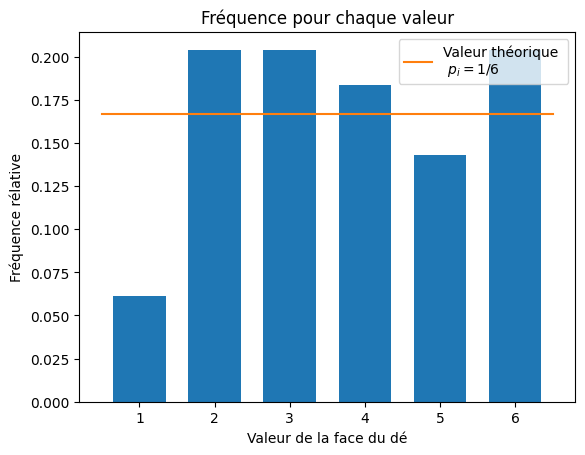

In [6]:
plt.hist(val, bins = np.arange(0.5,7.5,1), density = True, rwidth = 0.7)
plt.title("Fréquence pour chaque valeur")
plt.xlabel("Valeur de la face du dé")
plt.ylabel("Fréquence rélative")

plt.plot(np.arange(0.5,7.5,1), np.ones_like(np.arange(0.5,7.5,1))/6, label = "Valeur théorique \n $p_i= 1/6 $")
plt.legend()

 $$$$

## Partie 2: Génération de tirage d’un dé

Nous allons maintenant simuler une série de lancers d'un dé avec le module `random`. Nous allons créer une fonction `lancer()` qui renvoie un entier entre 1 et 6 suivant une distribution uniforme.
Nous allons ensuite utiliser cette fonction, ainsi que le module `numpy` et `matplotlib` pour générer des echantillons de lancers et en faire une étude statistique.

In [7]:
def lancer():
    return random.randint(1,6)

def ecartquad(L,p):
    moy=[]
    for n in L:
        moy.append((n-p)**2)
    return np.sqrt(moyList(moy))

In [21]:
def tirage(N):

    #Génération de N lancers
    lancers = []
    for i in range(N):
        lancers.append(lancer())
    #Représentation graphique de la fréquence rélative de chaque valeur
    f, bin, _ = plt.hist(lancers,bins=np.arange(0.5,7.5,1), rwidth=0.7, density=True)
    plt.plot(np.arange(0.5,7.5,1), np.ones_like(np.arange(0.5,7.5,1))/6, "--", linewidth = 0.7, label = "Valeur théorique \n $p_i= 1/6 $")
    plt.legend()
    plt.xlabel("Valeur lancer")
    plt.ylabel("Fréquence rélative: $f_i$")
    plt.title("Fréquence rélative pour chaque valeur possible des lancers. N =" + str(N))
    return lancers, f, bin


Ecart quadratique entre fi et p: 0.00020892588927867126


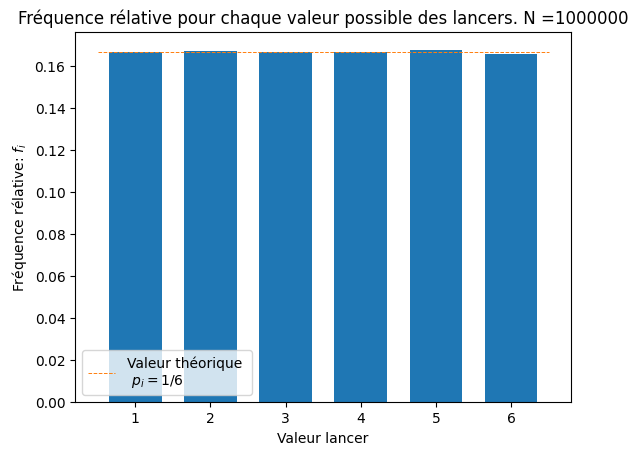

In [22]:
#N = 1000000 lancers
lancers,f,bin=tirage(1000000)

delta = ecartquad(f,1/6)
print("Ecart quadratique entre fi et p: {}".format(delta))

On a affecté aux variables `f` et `ax` les les valeurs extraites de notre histogramme. `f` corréspond aux valeurs de $f_i$ pour chaque valeur possible du lancer du dé, `ax` c'est l'array des bins.

Ecart quadratique entre fi et p: 0.01649572197684645


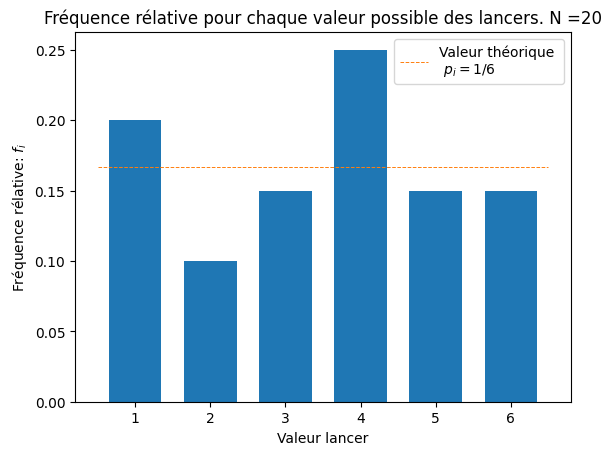

In [23]:
#Pour N = 20
lancers,f,bin=tirage(20)

delta = ecartquad(f,1/6)
print("Ecart quadratique entre fi et p: {}".format(delta))


Ecart quadratique entre fi et p: 0.018671889453997767


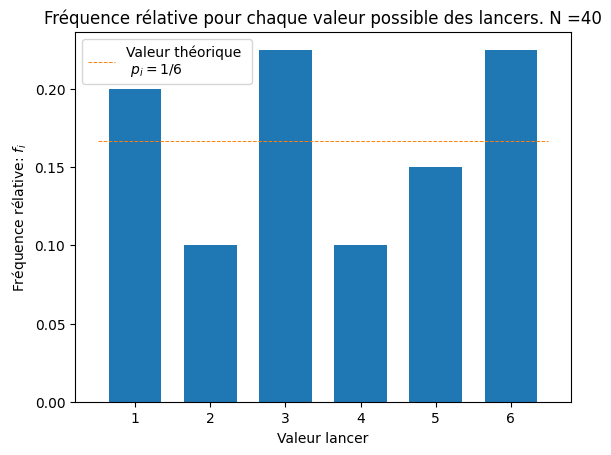

In [24]:
#Pour N = 40
lancers,f,bin=tirage(40)

delta = ecartquad(f,1/6)
print("Ecart quadratique entre fi et p: {}".format(delta))

Pour des valeurs croissantes de $N$ la valeur de $\Delta^2$ diminue.
Nous allons tracer cette dépendance sur un graphique log-log.

Text(0.5, 1.0, "$\\Delta$ en fonction de la taille de l'echantillon")

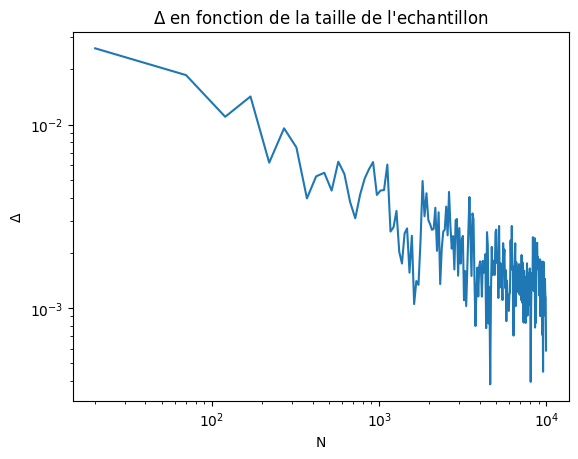

In [25]:
#Graphique pour N entre 20 et 1000000

N_tab = np.arange(20,10020,50)
ecart_tab = []
for N in N_tab:
    _,f,_=tirage(N)
    plt.close()
    ecart_tab.append(ecartquad(f,1/6))
plt.plot(N_tab,ecart_tab)
plt.loglog()
plt.xlabel("N")
plt.ylabel("$\Delta$")
plt.title("$\Delta$ en fonction de la taille de l'echantillon")

On rémarque que pour $N \rightarrow \infty, \Delta \rightarrow 0$ 

Nous allons maintenant simuler 10 enchantillons de 50 lancers indépendants (nous avons effectué 49 lancers dans la partie 1).

In [26]:
#Simulation de 10 echantillons de 50 lancers
delta50 = []
for i in range(10):
    _,f,_=tirage(50)
    plt.close()
    delta50.append(ecartquad(f,1/6))
print("Liste de la valeur de Delta pour chaque echantillon: {}".format(delta50))

#Valeurs extremes et estimation de la moyenne
Max = max(delta50)
Min = min(delta50)
moyDelta = 0.5*(Max+Min)

print("DeltaMax = {}, DeltaMin = {}".format(Max,Min))
print("DeltaMoyen = {}".format(moyDelta))

#Ecart type des valeurs de Delta et moyDelta

sigmaDelta = ecartquad(delta50,moyDelta)
print("Ecart-type de la liste Delta: {}".format(sigmaDelta))

Liste de la valeur de Delta pour chaque echantillon: [0.014380637019563335, 0.011895234282663614, 0.027305278451107525, 0.0241311608748951, 0.016983385238216197, 0.009618576131773407, 0.013801311186847083, 0.010432810619146022, 0.0296005147960382, 0.009618576131773407]
DeltaMax = 0.0296005147960382, DeltaMin = 0.009618576131773407
DeltaMoyen = 0.0196095454639058
Ecart-type de la liste Delta: 0.003472411861333082


On peut comparer cette valeur aux valeurs obtenues avec notre dé.

In [27]:
#Ecart quadratique moyen entre fi et p=1/6 pour le dé initiale
deDelta = 0
for n in DicoEcart.values():
    deDelta += n**2
deDelta = np.sqrt(deDelta/len(DicoEcart.values()))
print("Ecart quadratique moyen pour le fi du dé: {}".format(deDelta))


Ecart quadratique moyen pour le fi du dé: 0.05191951538256377


Notre valeur de $\Delta_{dé}$ est environ le double de la valeur $\Delta_{max}$ des simulations. Elle ne se situe pas entre $\pm 3\sigma_ {Delta}$ donc on peut conclure que notre dé était pipé. 

$$

## Distribution de sommes de dés

Nous allons maintenant étudier les distributions de sommes de dés, notamment ce qu’il se passe lorsque
le nombre de dés sommés augmente.

In [28]:
def liste_lancers(N): #crée une liste de N lancers aléatoire avec une distribution uniforme entre 1 et 6
    lancers = []
    for i in range(N):
        lancers.append(lancer())
    return lancers

def somme_des(L,k):

    new_list = []
    i=0

    while i<= len(L):
        somme = sum(L[i*k:(i+1)*k-1])
        new_list.append(somme)
        i =i+1
    return new_list
def bin(k): #à utiliser avec somme_des quand on trace les histogramme. prend en entrée la meme vaeur de k que somme_des
    Bins = np.arange(k-0.5,6*k+0.5,1)
    return Bins

In [29]:
liste1000000 = liste_lancers(1000000)

Text(0.5, 1.0, 'Histogramme pour k=2')

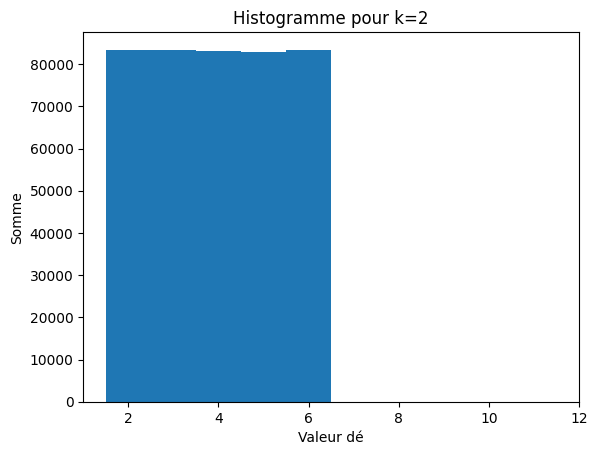

In [30]:
#Cas k=2
plt.hist(somme_des(liste1000000,2),bins=bin(2))
plt.xlabel("Valeur dé")
plt.ylabel("Somme")
plt.title("Histogramme pour k=2")

Pour $k=2$ la distribution ressemble à une distribution uniforme avec des valeur 1 pour $x \in [0,6]$ et 0 pour $x \in ]6,0]$

Text(0.5, 1.0, 'Histogramme pour k=3')

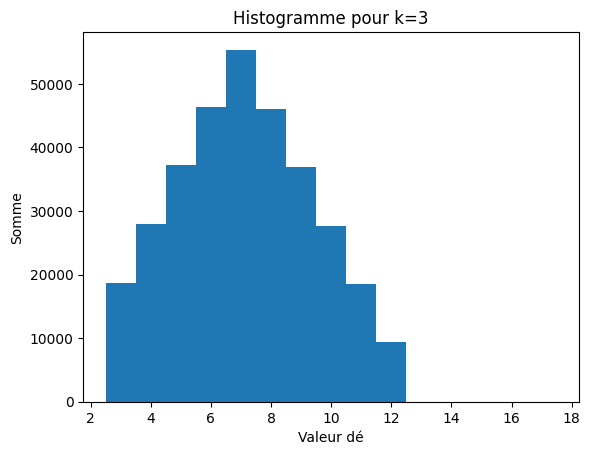

In [31]:
#Cas k=3
plt.hist(somme_des(liste1000000,3),bins=bin(3))
plt.xlabel("Valeur dé")
plt.ylabel("Somme")
plt.title("Histogramme pour k=3")

Text(0.5, 1.0, 'Histogramme pour k=10')

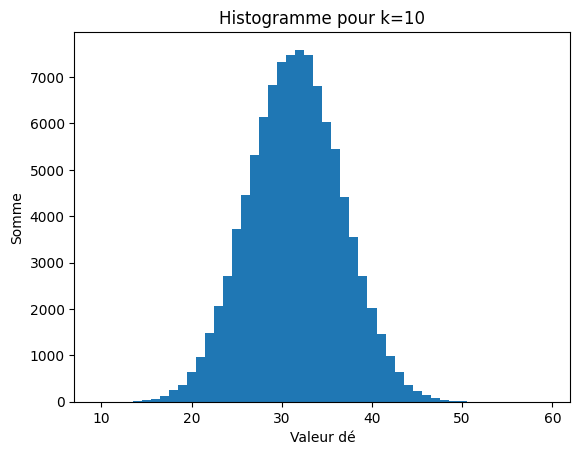

In [32]:
#Cas k=10
plt.hist(somme_des(liste1000000,10),bins=bin(10))
plt.xlabel("Valeur dé")
plt.ylabel("Somme")
plt.title("Histogramme pour k=10")

Text(0.5, 1.0, 'Histogramme pour k=100')

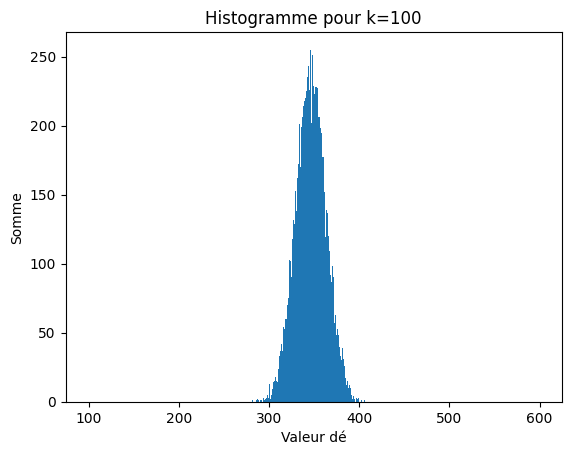

In [33]:
#Cas k=100
plt.hist(somme_des(liste1000000,100),bins=bin(100))
plt.xlabel("Valeur dé")
plt.ylabel("Somme")
plt.title("Histogramme pour k=100")

Pour $k=10$ et $k=100$ la distribution se rapproche d'une distribution normale.

$$

## Conclusion

Avec cette expérience nous avons pu étudier l'importance de la taille d'un échantillon de données dans l'étude statistique d'un problème. Nous avonc tout d'abord analysé un problème réelle (les lancers du dé dans la salle de TP), pour ensuite passer à une étude plus générale du problème en s'appuyant sur des simulation et des représentantion graphiques des grandeurs souhaitées.